In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## __1 - Business Problem__  
___Build a random forest for the ‘iris’ data___  

## __2 - Data collection and description__ 

In [7]:
iris = load_iris()

In [8]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [9]:
df1 = df.copy()

In [10]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [12]:
df1.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [13]:
df1.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [14]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

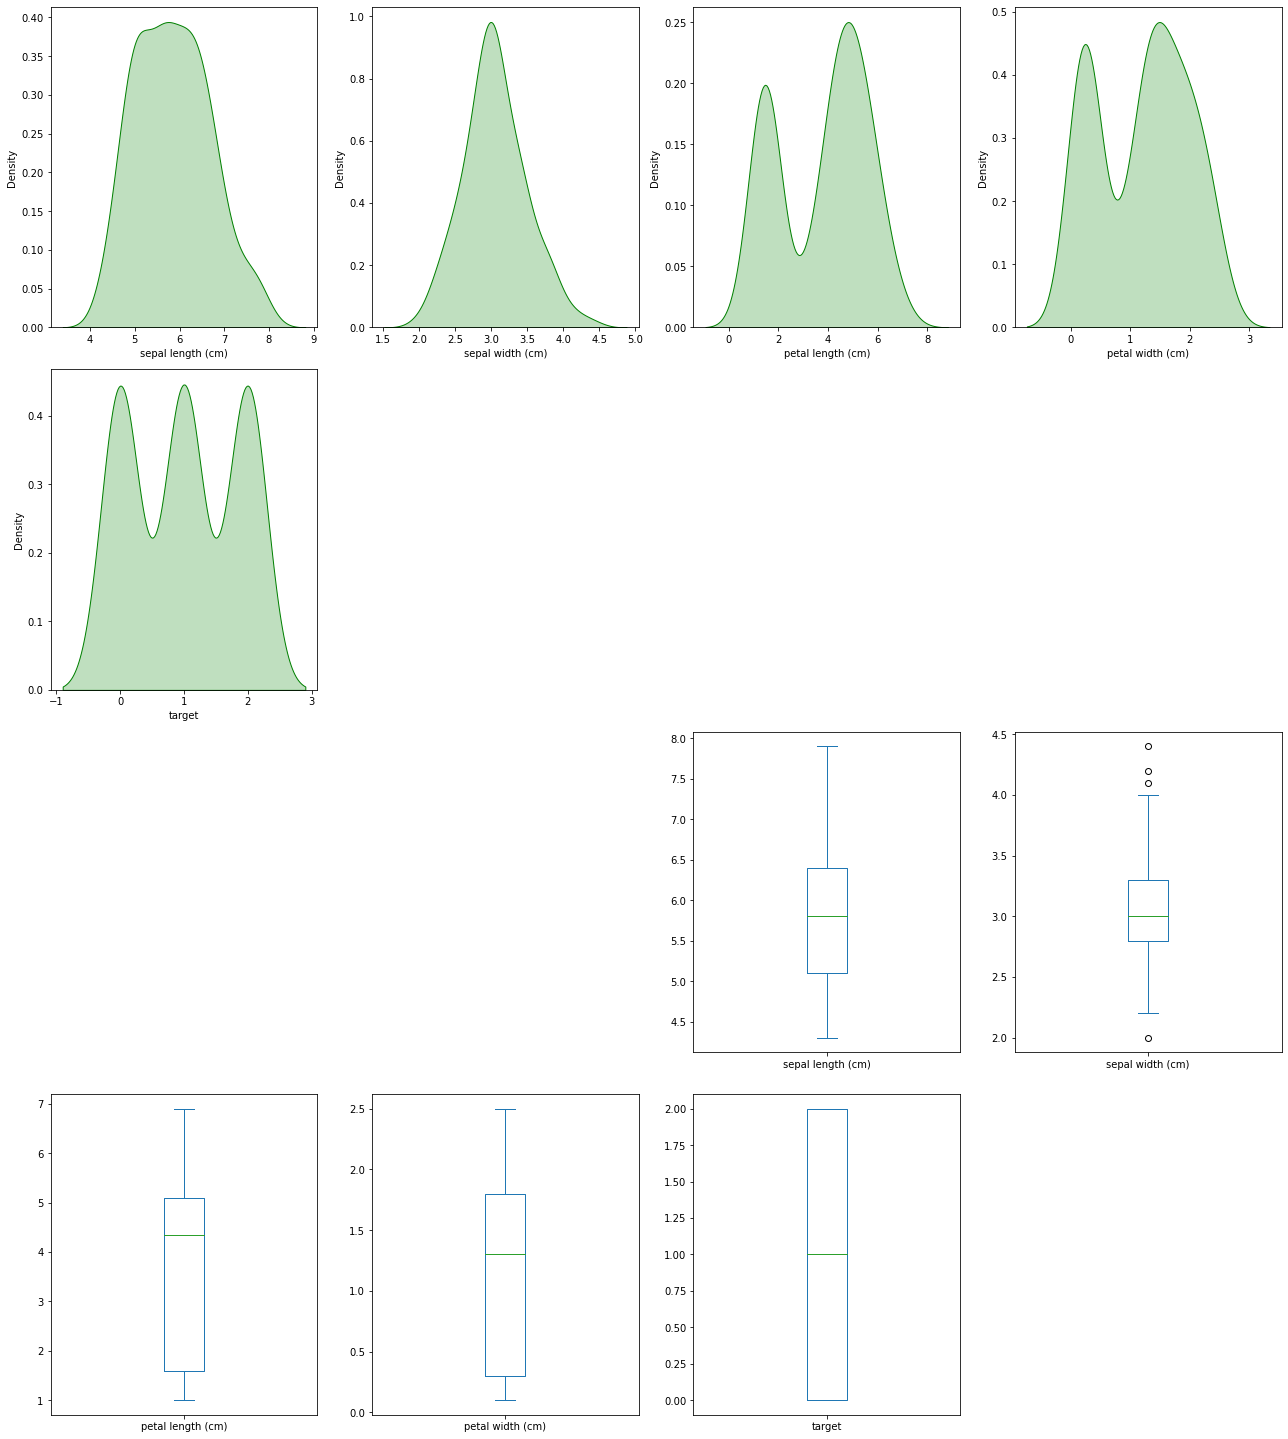

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
skewness,0.314911,0.318966,-0.274884,-0.102967,0.000000
kurtosis,-0.552064,0.228249,-1.402103,-1.340604,-1.510135


In [15]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [16]:
corr = df1.corr()

<AxesSubplot:>

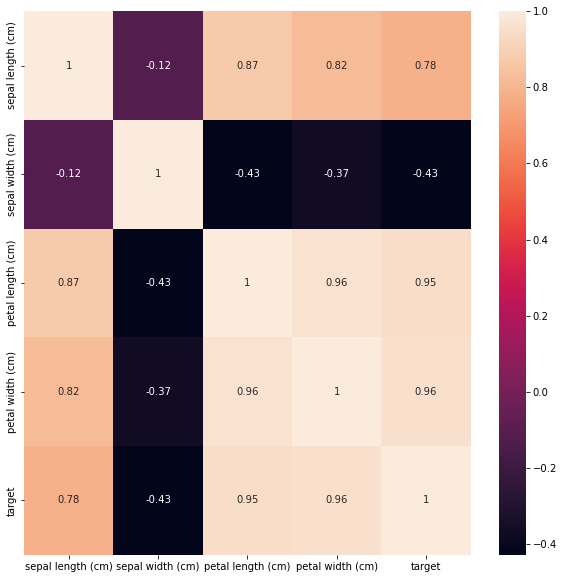

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## __3 - Random Forest Model__ 

In [18]:
df1.target.unique()

array([0., 1., 2.])

In [19]:
list(df1.columns)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [20]:
X = df1.iloc[:,0:4]
y = df1.iloc[:,4]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [22]:
y_train.value_counts()

2.0    42
1.0    41
0.0    37
Name: target, dtype: int64

In [23]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.95

In [24]:
pred_train = model.predict(x_train)

In [25]:
accuracy_score(y_train,pred_train)

1.0

In [26]:
confusion_matrix(y_train,pred_train)

array([[37,  0,  0],
       [ 0, 41,  0],
       [ 0,  0, 42]], dtype=int64)

In [27]:
pred_test = model.predict(x_test)

In [28]:
accuracy_score(y_test,pred_test)

0.9666666666666667

In [29]:
confusion_matrix(y_test,pred_test)

array([[13,  0,  0],
       [ 0,  8,  1],
       [ 0,  0,  8]], dtype=int64)

In [30]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [31]:
df_t

,Actual,Predicted
7,0.0,0.0
81,1.0,1.0
120,2.0,2.0
124,2.0,2.0
43,0.0,0.0
0,0.0,0.0
24,0.0,0.0
102,2.0,2.0
149,2.0,2.0
93,1.0,1.0


In [32]:
cols = list(df1.columns)

In [33]:
predictors = cols[0:4]
target = cols[4]

In [34]:
tree1 = model.estimators_[20]

## __4 - Conclusion__ 

### Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 96%  

In [35]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [36]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [37]:
tree_small = rf_small.estimators_[5]

In [38]:
model.feature_importances_

array([0.09722745, 0.02804713, 0.40956928, 0.46515614])

In [39]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [40]:
fi

,feature,importance
3,petal width (cm),0.465156
2,petal length (cm),0.409569
0,sepal length (cm),0.097227
1,sepal width (cm),0.028047


### As seen in the above table petal width is most important feature